In [1]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import sys
import os
import json
import pickle
import random
import numpy as np

from vqa_api.PythonHelperTools.vqaTools.vqa import VQA
from skip_thoughts import skipthoughts
from skipthoughts_embedding import SkipThoughts

Using TensorFlow backend.


In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
#dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataDir = r"/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset"

In [5]:
embedding = SkipThoughts(dataDir, n_train=300)

/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset/Annotations/mscoco_train2014_annotations.json
--> train2014
loading VQA annotations and questions into memory...
0:00:12.728667
creating index...
index created!
Loading model parameters...
Compiling encoders...
Loading tables...
Packing up...


In [6]:
embedding.encode_train_questions()

  0%|          | 0/12 [00:00<?, ?it/s]

4


  8%|▊         | 1/12 [00:00<00:04,  2.66it/s]

5


 17%|█▋        | 2/12 [00:00<00:03,  2.82it/s]

6


 25%|██▌       | 3/12 [00:01<00:03,  2.54it/s]

7


 33%|███▎      | 4/12 [00:01<00:03,  2.50it/s]

8


 42%|████▏     | 5/12 [00:02<00:02,  2.40it/s]

9


 50%|█████     | 6/12 [00:02<00:02,  2.42it/s]

10


 58%|█████▊    | 7/12 [00:02<00:01,  2.51it/s]

11


 75%|███████▌  | 9/12 [00:03<00:01,  2.84it/s]

12
13


 92%|█████████▏| 11/12 [00:03<00:00,  3.15it/s]

14
16


100%|██████████| 12/12 [00:03<00:00,  3.18it/s]


In [7]:
# We have embedded 300 train questions
embedding.vectors_train.shape
# embedding.vectors_train_idx_to_qid

(300, 4800)

In [8]:
embedding.encode_test_questions(n_test=300)

loading VQA annotations and questions into memory...
0:00:05.293273
creating index...
index created!


  0%|          | 0/14 [00:00<?, ?it/s]

4


  7%|▋         | 1/14 [00:00<00:03,  3.67it/s]

5


 14%|█▍        | 2/14 [00:00<00:03,  3.68it/s]

6


 21%|██▏       | 3/14 [00:00<00:03,  3.25it/s]

7


 29%|██▊       | 4/14 [00:01<00:03,  2.91it/s]

8


 36%|███▌      | 5/14 [00:01<00:03,  2.74it/s]

9


 43%|████▎     | 6/14 [00:02<00:02,  2.86it/s]

10


 50%|█████     | 7/14 [00:02<00:02,  2.97it/s]

11


 64%|██████▍   | 9/14 [00:02<00:01,  3.22it/s]

12
13


 86%|████████▌ | 12/14 [00:03<00:00,  3.68it/s]

15
16


100%|██████████| 14/14 [00:03<00:00,  3.92it/s]

17
19


In [9]:
embedding.vectors_test.shape

(300, 4800)

In [10]:
A = embedding.nearest_neighbors()

In [11]:
A

{21420: array([ 827592, 3377262, 4670630, 2333812]),
 21421: array([2139631, 4239642, 2080110,  734610]),
 21422: array([ 810741,  810740, 2249751, 3672591]),
 24770: array([3377260,   61070, 1217311, 5201120]),
 24771: array([ 827590, 1217311, 3377260, 3823162]),
 24772: array([1297261, 3377262, 2456092, 4646050]),
 35010: array([5339570, 4889620, 3037031, 4918881]),
 35011: array([3672591, 4918882, 3823160, 2249751]),
 35012: array([4800822,  208571, 4852470, 1638180]),
 86470: array([2620981, 5760720, 1217312, 5479381]),
 86471: array([3716470, 4974941, 1317801, 3037031]),
 86472: array([5585670, 5479382, 5228202, 2710380]),
 96990: array([1150050, 5016471, 4646051, 2597210]),
 96991: array([5585671, 5228202, 4239642,  281090]),
 96992: array([4646051, 2249751, 5697232,  810741]),
 264480: array([4646050, 5231861, 4974940, 1317802]),
 264481: array([4044861, 2794012, 3011090, 5201120]),
 264482: array([3672592, 4617010,    7970, 2678312]),
 360120: array([4646051, 2336470, 3623632, 

For each question id in the test set, we get the 4 most similar questions in the train set. 

In [12]:
# Let's check the embeddings for a specific question from the test set
question_id_test = random.choice(embedding.vectors_test_idx_to_qid.values())
print(question_id_test)

3751430


In [13]:
# Corresponding question to the above question id
[d["question"] for d in embedding.questions_test if d["question_id"] == question_id_test]

[u'Is this person wearing shoes?']

In [14]:
# Nearest questions from the train set
[d["question"] for i in range(4) 
 for d in embedding.questions_train 
 if d["question_id"] == A[question_id_test][i]]

[u'Is this person wearing a hat?',
 u'Is this person in the air?',
 u'Is someone wearing a hat?',
 u'Is everyone wearing life jackets?']

In [15]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tools import img_dir, img_file

import keras
from keras.layers import Dense, Dropout, LSTM, multiply
from keras.layers.embeddings import Embedding
from keras.utils import plot_model
from keras.layers import Input
from keras.models import Model

In [16]:
embedding.encode_train_images()

In [17]:
embedding.encode_test_images()

In [18]:
topImages = embedding.top_images()

In [19]:
topImages #question ID to top_image

{21420: 467063,
 21421: 73461,
 21422: 224975,
 24770: 520112,
 24771: 337726,
 24772: 337726,
 35010: 533957,
 35011: 491888,
 35012: 20857,
 86470: 547938,
 86471: 131780,
 86472: 558567,
 96990: 501647,
 96991: 522820,
 96992: 224975,
 264480: 464605,
 264481: 279401,
 264482: 461701,
 360120: 279401,
 360121: 501867,
 360122: 233647,
 425340: 233647,
 425341: 62941,
 425342: 279401,
 562050: 267831,
 562051: 423964,
 562052: 224975,
 586550: 131780,
 586551: 558567,
 586552: 522820,
 592950: 129726,
 592951: 475967,
 592952: 233647,
 649740: 224975,
 649741: 233381,
 649742: 233381,
 650080: 401720,
 650081: 6107,
 650082: 131780,
 652270: 464605,
 652271: 224975,
 652272: 233381,
 664910: 523186,
 664911: 233647,
 664912: 47386,
 763840: 303703,
 763841: 303703,
 763842: 214927,
 797210: 121731,
 797211: 464605,
 797212: 233381,
 840180: 224975,
 840181: 28109,
 840182: 121731,
 851440: 547938,
 851441: 233647,
 851442: 73461,
 868480: 303703,
 868481: 464605,
 868482: 303703,
 96

In [40]:
#dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataDir = r"/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset"
versionType = '' # this should be '' when using VQA v1.0 dataset
taskType    = 'OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' 
                          # or 'MultipleChoice' for v1.0
dataType    = 'mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 
                        # 'abstract_v002' for abstract for v1.0.
annFile     = '%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, 
                                                         dataType, dataSubType)
quesFile    = '%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, 
                                                        taskType, dataType, 
                                                        dataSubType)
imgDir      = '%s/Images/%s' %(dataDir, dataType)
train_qID_to_imgID={dic["question_id"]:dic["image_id"] for dic in embedding.questions_train}
test_qID_to_imgID = {dic["question_id"]:dic["image_id"] for dic in embedding.questions_test}

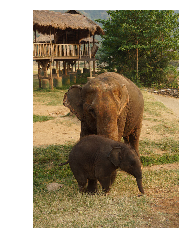

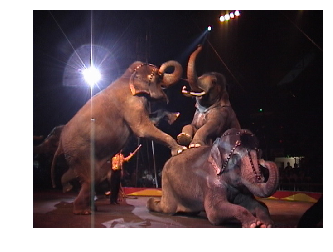

In [66]:
import skimage.io as io
import matplotlib.pyplot as plt
qID = np.random.choice(topImages.keys())
imgID = test_qID_to_imgID[qID]
topImgID = topImages[qID]
imgFileName = 'COCO_' + 'val2014' + '_'+ str(imgID).zfill(12) + '.jpg'
topImgFileName = 'COCO_' + 'train2014' + '_'+ str(topImgID).zfill(12) + '.jpg'

# plot image from val
I = io.imread('%s/val2014/'%(imgDir) + imgFileName)
plt.imshow(I)
plt.axis('off')
plt.show()

# nearest image from train
I = io.imread('%s/train2014/'%(imgDir) + topImgFileName)
plt.imshow(I)
plt.axis('off')
plt.show()